In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Generate profiling report**

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Omkar\AppData\Local\Temp\ipykernel_21424\3146063189.py:1: SyntaxWarning: invalid escape sequence '\.'
  df = pd.read_csv("..\..\datasets\DS-2-8-25\comprehensive_clothing_dataset_expanded_20250802_210102.csv")



Dataset Shape: (1240, 25)

Data Types:
 source                  object
category                object
brand                   object
name                    object
price                    int64
original_price           int64
rating                 float64
rating_count             int64
url                     object
scraped_date            object
size                    object
color                   object
material                object
discount_percentage    float64
availability            object
product_id              object
is_bestseller             bool
return_policy           object
delivery_time           object
season                  object
trending                  bool
customer_reviews         int64
flipkart_assured        object
prime_eligible          object
amazon_choice           object
dtype: object

Missing Values:
 source                    0
category                  0
brand                     0
name                      0
price                     0
original_pri

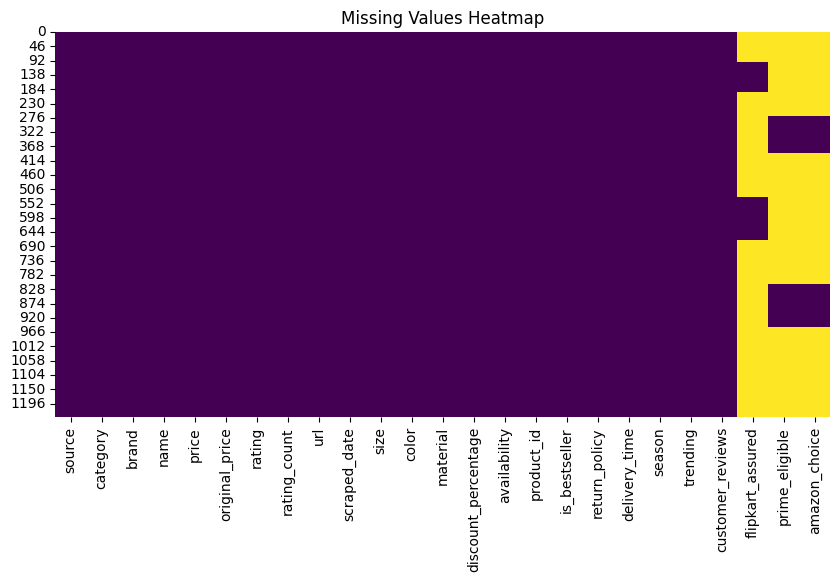

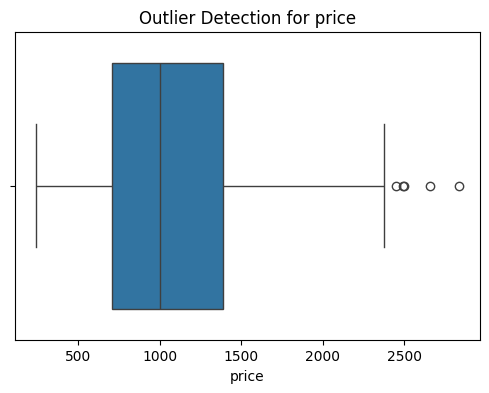

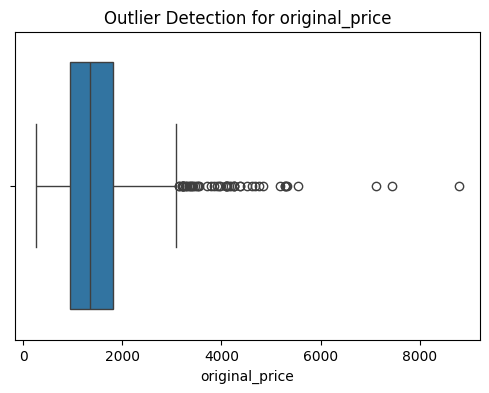

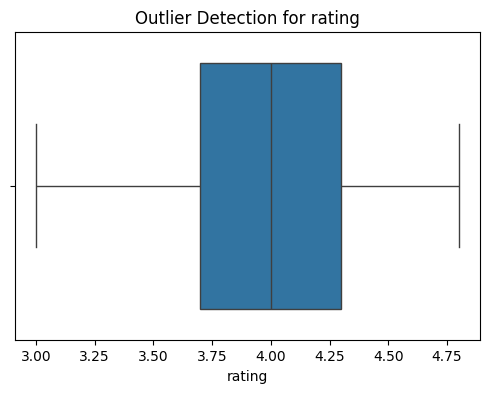

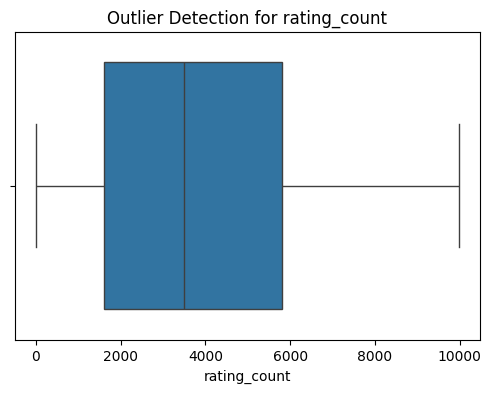

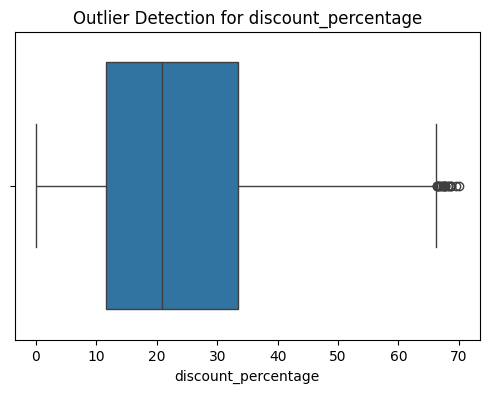

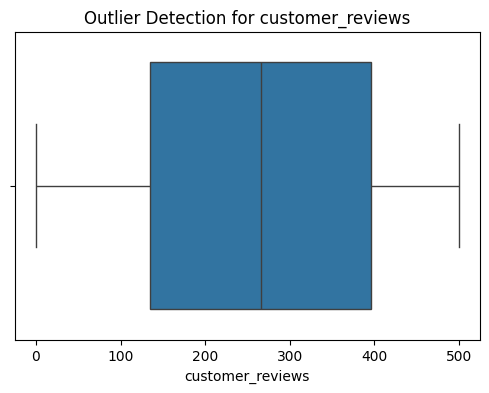

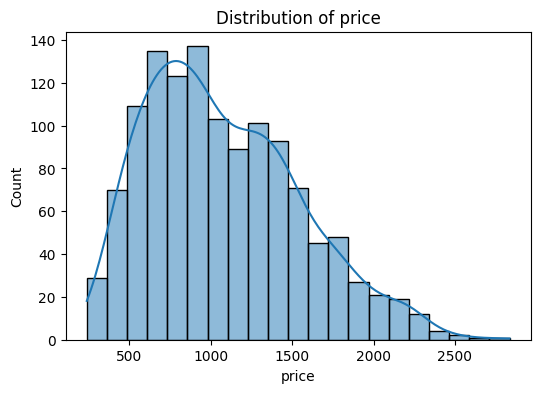

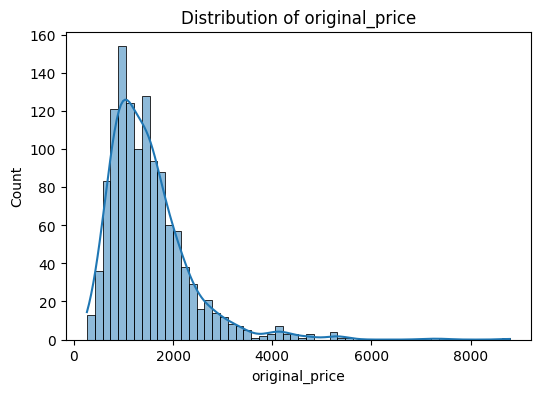

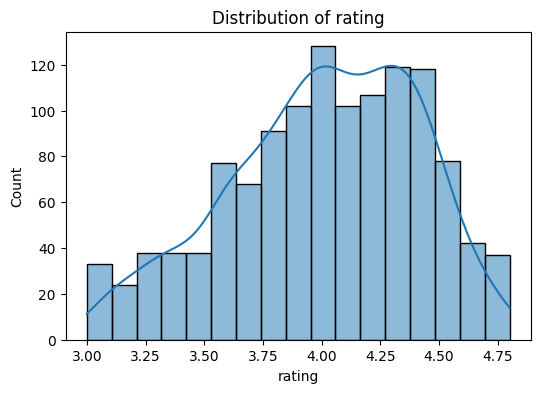

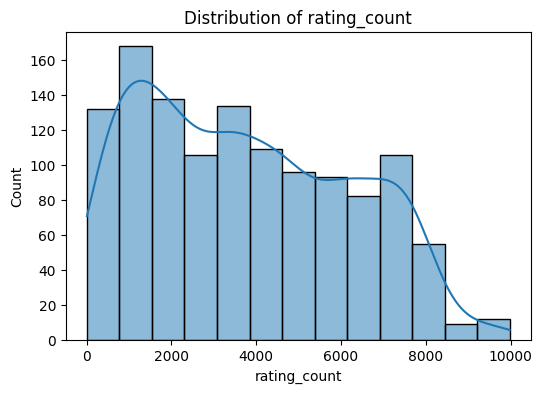

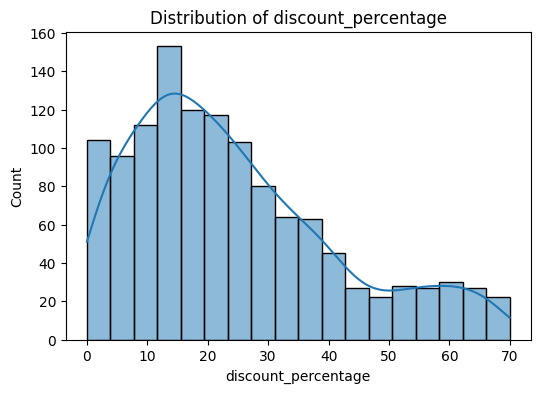

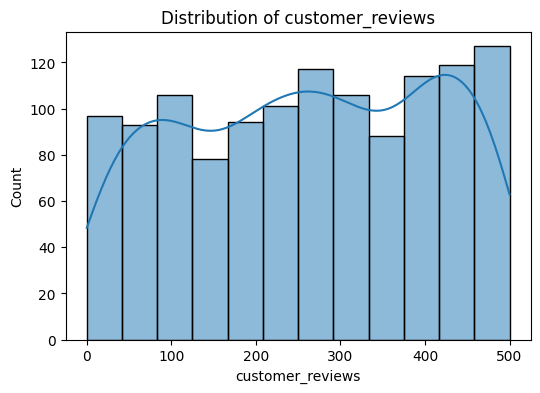

In [2]:
df = pd.read_csv("..\..\datasets\DS-2-8-25\comprehensive_clothing_dataset_expanded_20250802_210102.csv")

print("\nDataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

print("\nNumeric Columns Summary:\n", df.describe())

print("\nCategorical Columns Summary:\n", df.describe(include='object'))

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [3]:
%pip install pyjanitor

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s  0:00:00

   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- ----------------------- 2/5 [xarray]
   ---------------- --------------------

**Data Cleaning**

In [5]:
import janitor

# Fill missing size with mode
df['size'].fillna(df['size'].mode()[0], inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Clean categorical columns
categorical_cols = ['category', 'color', 'material', 'availability', 'return_policy', 'delivery_time']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()

print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (1240, 25)


C:\Users\Omkar\AppData\Local\Temp\ipykernel_21424\3369490152.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(df['size'].mode()[0], inplace=True)


**Feature Engineering**

In [6]:
# Calculate discount value
df['discount_value'] = df['original_price'] - df['price']

# Discount flag
df['discount_flag'] = (df['discount_value'] > 0).astype(int)

# Convert scraped_date to datetime and extract weekday
df['scraped_date'] = pd.to_datetime(df['scraped_date'])
df['scraped_weekday'] = df['scraped_date'].dt.day_name()

# Example: time_of_day_flag (mock logic: based on price just for example)
df['time_of_day_flag'] = pd.cut(df['price'],
                                bins=[0, 500, 1000, 2000],
                                labels=['Morning', 'Afternoon', 'Evening'])


In [ ]:
df = pd.read_csv("/content/raw_dataset.csv")


In [7]:
%pip install pandera --quiet

Note: you may need to restart the kernel to use updated packages.


**Schema Validation**

In [8]:

import pandera as pa
from pandera import Column, DataFrameSchema, Check
import pandas as pd

# Define schema
schema = DataFrameSchema({
    "price": Column(int, Check.greater_than_or_equal_to(0), nullable=False),
    "category": Column(str, nullable=False),
    "rating": Column(float, Check.in_range(0, 5), nullable=False),
    "discount_percentage": Column(float, Check.in_range(0, 100), nullable=False),
})

# Validate DataFrame
schema.validate(df)
print("✅ Schema validation passed!")


✅ Schema validation passed!


c:\Users\Omkar\SEM_7\DS_Project\dvc_env\Lib\site-packages\pandera\_pandas_deprecated.py:149: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [9]:
df

,source,category,brand,name,price,original_price,rating,rating_count,url,scraped_date,...,season,trending,customer_reviews,flipkart_assured,prime_eligible,amazon_choice,discount_value,discount_flag,scraped_weekday,time_of_day_flag
0,myntra,Men Tshirts,WROGN,WROGN Green Plain T-Shirt,628,857,4.8,3497,https://www.myntra.com/men-tshirts/wrogn-1,2025-08-02,...,festive,False,459,NaN,NaN,NaN,229,1,Saturday,Afternoon
1,myntra,Men Tshirts,WROGN,WROGN Classic Grey Round Neck T-Shirt,875,986,4.0,726,https://www.myntra.com/men-tshirts/wrogn-2,2025-08-02,...,festive,False,430,NaN,NaN,NaN,111,1,Saturday,Afternoon
2,myntra,Men Tshirts,Anouk,Anouk Grey Casual T-Shirt,631,784,4.2,3354,https://www.myntra.com/men-tshirts/anouk-3,2025-08-02,...,festive,False,301,NaN,NaN,NaN,153,1,Saturday,Afternoon
3,myntra,Men Tshirts,WROGN,WROGN Pink Plain T-Shirt,694,944,4.0,4377,https://www.myntra.com/men-tshirts/wrogn-4,2025-08-02,...,festive,False,222,NaN,NaN,NaN,250,1,Saturday,Afternoon
4,myntra,Men Tshirts,Anouk,Anouk Red Round Neck T-Shirt,499,568,4.4,4141,https://www.myntra.com/men-tshirts/anouk-5,2025-08-02,...,festive,False,207,NaN,NaN,NaN,69,1,Saturday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,ajio,Women Jeans,DNMX,DNMX Cotton Coral Boyfriend Jeans Relaxed Fit,1307,1371,3.9,5597,https://www.ajio.com/women-jeans/dnmx-1,2025-08-02,...,festive,False,338,NaN,NaN,NaN,64,1,Saturday,Evening
1236,ajio,Men Hoodies,Netplay,Netplay Modern Mustard Plain Hoodie,2006,2183,4.3,2029,https://www.ajio.com/men-hoodies/netplay-1,2025-08-02,...,festive,False,339,NaN,NaN,NaN,177,1,Saturday,NaN
1237,ajio,Women Hoodies,AJIO,AJIO Black Oversized Hoodie,1523,1839,4.4,2817,https://www.ajio.com/women-hoodies/ajio-1,2025-08-02,...,festive,False,497,NaN,NaN,NaN,316,1,Saturday,Evening
1238,ajio,Men Shorts,AJIO,AJIO Purple Athletic Shorts,686,877,3.9,2953,https://www.ajio.com/men-shorts/ajio-1,2025-08-02,...,festive,False,257,NaN,NaN,NaN,191,1,Saturday,Afternoon


In [10]:
import os

datasets_dir = "../../datasets/DS-2-8-25"
os.makedirs(datasets_dir, exist_ok=True)

clean_dataset_path = os.path.join(datasets_dir, "cleaned_clothing_dataset.csv")
df.to_csv(clean_dataset_path, index=False)

print(f"✅ Clean dataset saved to: {clean_dataset_path}")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\n📝 To add this dataset to DVC tracking, run these commands in terminal:")
print("cd ../../")
print(f"dvc add {clean_dataset_path}")
print("git add *.dvc .gitignore")
print('git commit -m "Add cleaned dataset to DVC tracking"')
print("dvc push")

✅ Clean dataset saved to: ../../datasets/DS-2-8-25\cleaned_clothing_dataset.csv
Dataset shape: (1240, 29)
Columns: ['source', 'category', 'brand', 'name', 'price', 'original_price', 'rating', 'rating_count', 'url', 'scraped_date', 'size', 'color', 'material', 'discount_percentage', 'availability', 'product_id', 'is_bestseller', 'return_policy', 'delivery_time', 'season', 'trending', 'customer_reviews', 'flipkart_assured', 'prime_eligible', 'amazon_choice', 'discount_value', 'discount_flag', 'scraped_weekday', 'time_of_day_flag']

📝 To add this dataset to DVC tracking, run these commands in terminal:
cd ../../
dvc add ../../datasets/DS-2-8-25\cleaned_clothing_dataset.csv
git add *.dvc .gitignore
git commit -m "Add cleaned dataset to DVC tracking"
dvc push
